In [1]:
import sys
sys.path.append('../')
import os
#from utils.imageprocessing import 
from models.centroid_UNet.predict import predict_img, plot_img_and_mask, mask_to_image
import torch
from models.centroid_UNet import model as UNet
from PIL import Image

In [2]:
path = './checkpoints_unet-centroid-standard-iou-b6_2024-05-15_19-47/checkpoint_epoch15.pth'
filename = '../data/2024-04-21-dataset/standard/test/images/tile_tif_23_12.png'

In [3]:
net = UNet(n_channels=3, n_classes=2)#, bilinear=False)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net.to(device=device)

state_dict = torch.load(path, map_location=device)

mask_values = state_dict.pop('mask_values', [0, 255])
net.load_state_dict(state_dict)

/home/ubuntu/banoczymartin_thesis/canopyseg/lib/python3.12/site-packages/torch/cuda/__init__.py:628: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


<All keys matched successfully>

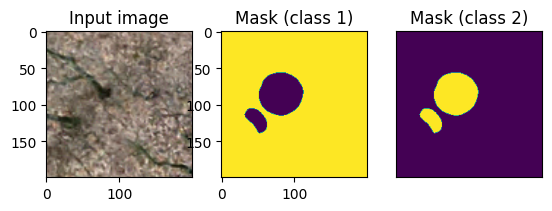

In [68]:
img = Image.open(filename)
mask = predict_img(net=net,
                   full_img=img,
                   scale_factor=1,
                   out_threshold=0.9,
                   device=device)
plot_img_and_mask(img, mask)

In [69]:
mask.max()

1

In [70]:
out_img = mask_to_image(mask,[0, 1])

In [45]:
out_img.save("./test_image.png")

In [4]:
folder = '../data/2024-04-21-dataset/standard/test/images'
preds_folder = '../data/2024-04-21-dataset/standard/test/predictions-centroid-adam'
os.makedirs(preds_folder, exist_ok=True)


for image_path in os.listdir(folder):
    img = Image.open(os.path.join(folder,image_path))
    mask = predict_img(net=net,
                       full_img=img,
                       scale_factor=1,
                       out_threshold=0.9,
                       device=device)
    out_img = mask_to_image(mask,[0, 1])
    x,y = os.path.basename(image_path).split('.')[0].split('_')[2:4]
    out_img.save(os.path.join(preds_folder,f'mask_{x}_{y}.png'))
    

In [5]:
import shutil

In [6]:
shutil.make_archive('predictions-centroid-adam', 'zip', '../data/2024-04-21-dataset/standard/test/predictions-centroid-adam')

'/home/ubuntu/banoczymartin_thesis/TreeDetection/src/predictions-centroid-adam.zip'

In [73]:

shutil.make_archive('predictions-centroid', 'zip', '../data/2024-04-21-dataset/standard/test/predictions-centroid')
shutil.make_archive('predictions-biomed', 'zip', '../data/2024-04-21-dataset/standard/test/predictions-biomed')

'/home/ubuntu/banoczymartin_thesis/TreeDetection/src/predictions-biomed.zip'

In [77]:
shutil.make_archive('images', 'zip', '../data/2024-04-21-dataset/standard/test/images')

'/home/ubuntu/banoczymartin_thesis/TreeDetection/src/images.zip'

In [78]:
shutil.make_archive('masks', 'zip', '../data/2024-04-21-dataset/standard/test/masks')

'/home/ubuntu/banoczymartin_thesis/TreeDetection/src/masks.zip'

In [79]:
shutil.make_archive('orig_set', 'zip', '../data/2024-04-21-dataset/standard/original')


'/home/ubuntu/banoczymartin_thesis/TreeDetection/src/orig_set.zip'